<a href="https://colab.research.google.com/github/datascience-uniandes/hypothesis-testing-tutorial/blob/master/hypothesis-testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

MINE-4101: Applied Data Science  
Univerisdad de los Andes
Lizeth Viviana Perdomo Castañeda  
  
**Dataset:** AirBnb Listings - Santiago, Región Metropolitana de Santiago, Chile [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Santiago de Chile. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: September, 2024

In [1]:
import pip

%pip install seaborn
%pip install mlxtend
%pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### Load the data

In [4]:
listings_Santiago_df = pd.read_csv("./listings.csv.gz").sample(frac=0.05, random_state=100)

In [5]:
listings_Santiago_df.shape

(653, 75)

In [6]:
listings_Santiago_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [7]:
listings_Santiago_df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3502,36037672,https://www.airbnb.com/rooms/36037672,20240629050059,2024-06-29,city scrape,Pieza Individual con acceso independiente,A room with a separate entrance of 9 square me...,"quiet, very pleasant neighborhood. with many g...",https://a0.muscache.com/pictures/877a3034-4af9...,271117700,https://www.airbnb.com/users/show/271117700,Angeles,2019-06-24,"Santiago, Chile",NaN,NaN,NaN,79%,t,https://a0.muscache.com/im/pictures/user/e4392...,https://a0.muscache.com/im/pictures/user/e4392...,NaN,1,1,"['email', 'phone']",t,t,"Lo Barnechea, Región Metropolitana, Chile",Lo Barnechea,NaN,-33.363110,-70.533720,Private room in guest suite,Private room,1,1.0,1 private bath,1.0,1.0,"[""Wifi"", ""Private entrance"", ""Lock on bedroom ...","$20,000.00",5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,7,29,59,334,2024-06-29,39,9,0,2019-07-28,2024-03-29,4.74,4.77,4.72,4.85,4.85,4.77,4.72,NaN,f,1,0,1,0,0.65
6933,775951047607368893,https://www.airbnb.com/rooms/775951047607368893,20240629050059,2024-06-29,city scrape,Hermoso Apartamento Studio Santiago centro p7,This place is strategically located - it will ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,473532897,https://www.airbnb.com/users/show/473532897,Santiago,2022-08-05,NaN,NaN,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,11,15,"['email', 'phone']",t,t,NaN,Santiago,NaN,-33.442610,-70.659205,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""TV"", ""Cooking basics"", ""Smoke alarm"", ""Paid ...","$32,000.00",2,365,1,2,1125,1125,1.4,1125.0,NaN,t,23,53,83,358,2024-06-29,6,1,0,2022-12-11,2023-10-02,3.67,4.00,3.83,4.17,4.50,4.33,3.67,NaN,t,11,11,0,0,0.32
446,6346765,https://www.airbnb.com/rooms/6346765,20240629050059,2024-06-29,city scrape,"Habitación, a pasos estadios",Family home offers room with private bathroom ...,NaN,https://a0.muscache.com/pictures/79395368/f4b5...,15675407,https://www.airbnb.com/users/show/15675407,Jaime,2014-05-18,"Santiago, Chile",Pareja joven conociendo el mundo con un perrijo,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/78900...,https://a0.muscache.com/im/pictures/user/78900...,NaN,1,1,"['email', 'phone']",t,t,NaN,El Bosque,NaN,-33.562840,-70.674980,Private room in home,Private room,1,1.0,1 bath,1.0,1.0,"[""Wifi"", ""TV"", ""Free parking on premises"", ""Es...","$56,811.00",2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,30,60,90,365,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
12233,1151105113740946711,https://www.airbnb.com/rooms/1151105113740946711,20240629050059,2024-06-29,city scrape,Amplio y moderno depto,Spacious and comfortable apartment in 

### Transform the data

In [8]:
listings_Santiago_df["price"] = listings_Santiago_df["price"].str.replace("[$,]", "", regex=True).astype(float)

### Remove selected properties

In [9]:
listings_Santiago_df = listings_Santiago_df.loc[listings_Santiago_df["room_type"] != "Hotel room"]

### Remove some critical outliers based on listing price

In [10]:
q1 = listings_Santiago_df["price"].quantile(0.25)
q3 = listings_Santiago_df["price"].quantile(0.75)
iqr = q3 - q1

In [11]:
listings_Santiago_df = listings_Santiago_df.loc[listings_Santiago_df["price"] <= (q3 + 1.5 * iqr)]

### Business question 1

After selecting a couple of neighborhoods with good investment potential, analyze the listing price for that neighborhoods. On average, one of the two neighborhoods has higher prices than the other one?

In [12]:
listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False)

neighbourhood_cleansed
Santiago            198
Providencia         101
Las Condes           82
Ñuñoa                41
Recoleta             12
San Miguel           11
Vitacura              8
La Florida            7
Estación Central      6
Maipú                 5
Lo Barnechea          5
Macul                 4
La Reina              4
San Joaquín           4
Independencia         3
Peñalolén             3
Huechuraba            2
La Cisterna           2
Cerrillos             1
Pudahuel              1
Quilicura             1
El Bosque             1
Name: count, dtype: int64

In [13]:
selected_neighborhoods = ["Providencia", "Las Condes"]

In [14]:
# Showing some statistics for neighborhoods of interest
listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"].isin(selected_neighborhoods)].groupby("neighbourhood_cleansed")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Las Condes,82.0,55487.817073,24815.189801,14000.0,34250.0,55000.0,69594.0,112500.0
Providencia,101.0,50317.435644,22705.880125,13000.0,30000.0,51143.0,63900.0,111483.0


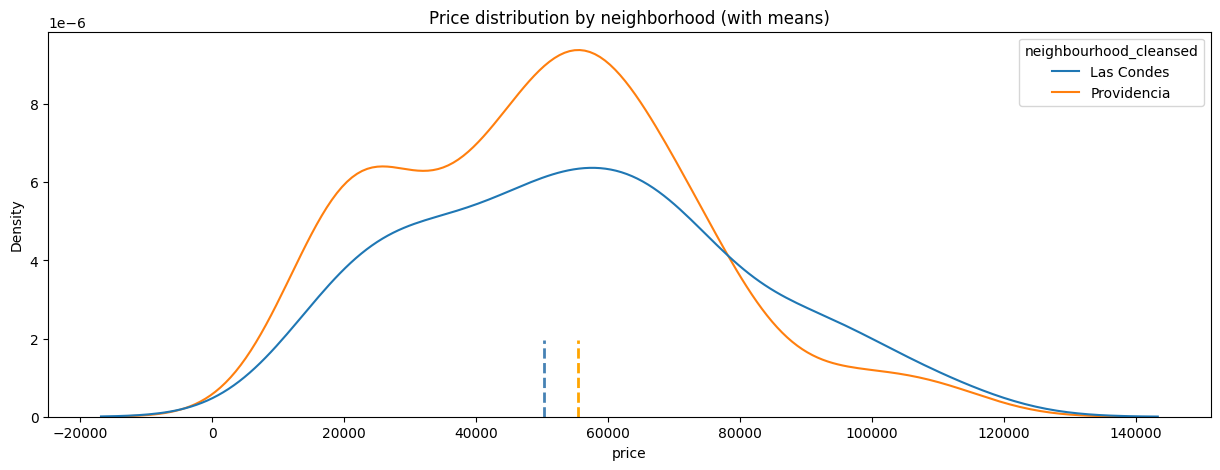

In [15]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(
    data=listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"].isin(selected_neighborhoods)],
    x="price",
    hue="neighbourhood_cleansed",
    ax=ax
)
for (neighborhood, color) in zip(selected_neighborhoods, ["steelblue", "orange"]):
    ax.axvline(listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"] == neighborhood, "price"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighborhood (with means)")
plt.show()

**Step 0.** Choose the appropriate test: t-test vs. Mann-Whitney.

In [16]:
# Testing normality for each group
print(f"{selected_neighborhoods[0]}:", shapiro(listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"] == selected_neighborhoods[0], "price"])[1])
print(f"{selected_neighborhoods[1]}:", shapiro(listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"] == selected_neighborhoods[1], "price"])[1])

Providencia: 0.008211505926788975
Las Condes: 0.07976957597699944


With a significance threshold of 0.01, and given that the Providencia data do not follow a normal distribution (p-value < 0.01), while Las Condes does, the most appropriate test is Mann-Whitney


**Step 1.** Define null and alternative hypothesis:

$$
H_0: \mu_1 = \mu_2
$$
$$
H_a: \mu_1 \neq \mu_2
$$  

**Step 2.** Define the desired significance level:

In [17]:
alpha = 0.01

**Step 3 and 4.** Calculate the statistic and p-value:

In [18]:
# Applying a non-parametric test
t_stat, p_value = mannwhitneyu(
    listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"] == selected_neighborhoods[0], "price"],
    listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"] == selected_neighborhoods[1], "price"]
)

In [19]:
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 3662.0
P-value: 0.17929839947754744


**Step 5.** Make the decision:

In [20]:
if p_value <= alpha:
    print(f"REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_neighborhoods[0]} and {selected_neighborhoods[1]} neighbourhoods is statistically significant.")
else:
    print(f"FAIL TO REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_neighborhoods[0]} and {selected_neighborhoods[1]} neighbourhoods is not statistically significant.")

FAIL TO REJECT THE NULL HYPOTHESIS: The difference in listing price between Providencia and Las Condes neighbourhoods is not statistically significant.


### Business question 2

In order to select the best room type for investing, are there room types being most predominant in some neighborhoods?

In [21]:
neighborhood_frec_cumsum = listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True).cumsum()
neighborhood_frec_cumsum

neighbourhood_cleansed
Santiago            0.394422
Providencia         0.595618
Las Condes          0.758964
Ñuñoa               0.840637
Recoleta            0.864542
San Miguel          0.886454
Vitacura            0.902390
La Florida          0.916335
Estación Central    0.928287
Maipú               0.938247
Lo Barnechea        0.948207
Macul               0.956175
La Reina            0.964143
San Joaquín         0.972112
Independencia       0.978088
Peñalolén           0.984064
Huechuraba          0.988048
La Cisterna         0.992032
Cerrillos           0.994024
Pudahuel            0.996016
Quilicura           0.998008
El Bosque           1.000000
Name: proportion, dtype: float64

In [22]:
# Filtering by Pareto's rule at 90%
most_representative_neighborhoods = neighborhood_frec_cumsum.loc[neighborhood_frec_cumsum < 0.9].index.tolist()
most_representative_neighborhoods

['Santiago', 'Providencia', 'Las Condes', 'Ñuñoa', 'Recoleta', 'San Miguel']

In [23]:
listings_Santiago_df["room_type"].value_counts(dropna=False, normalize=True)

room_type
Entire home/apt    0.709163
Private room       0.280876
Shared room        0.009960
Name: proportion, dtype: float64

In [24]:
contingency_table = pd.crosstab(
    listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"].isin(most_representative_neighborhoods)]["neighbourhood_cleansed"],
    listings_Santiago_df.loc[listings_Santiago_df["neighbourhood_cleansed"].isin(most_representative_neighborhoods)]["room_type"]
)
contingency_table

room_type,Entire home/apt,Private room,Shared room
neighbourhood_cleansed,,,
Las Condes,55,27,0
Providencia,69,30,2
Recoleta,7,4,1
San Miguel,9,2,0
Santiago,160,36,2
Ñuñoa,26,15,0


**Step 0.** Choose the appropriate test: chi-squared.

**Step 1.** Define null and alternative hypothesis:

$$
H_0: \text{The variables are independent}
$$
$$
H_a: \text{The variables are not independent}
$$ 

**Step 2.** Define the desired significance level:

In [25]:
alpha = 0.01

**Step 3 and 4.** Calculate the statistic and p-value:

In [26]:
chi2, p_value, _, expected_freq = chi2_contingency(contingency_table[["Entire home/apt", "Private room"]])

In [27]:
print("T-statistic:", chi2)
print("P-value:", p_value)

T-statistic: 12.309785172407086
P-value: 0.03078092806579923


In [28]:
if p_value <= alpha:
    print("REJECT THE NULL HYPOTHESIS: There's a statistically significant dependency between neighborhood and room type.")
else:
    print("FAIL TO REJECT THE NULL HYPOTHESIS: There's no statistically significant dependency between neighborhood and room type.")

FAIL TO REJECT THE NULL HYPOTHESIS: There's no statistically significant dependency between neighborhood and room type.
